In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning Algorithms/6-Decision Tree/framingham.csv")

In [7]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
data_final= df.dropna(axis=1)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_final.drop('TenYearCHD', axis=1),
                                                    data_final['TenYearCHD'], test_size=0.20,
                                                    random_state=101)

In [13]:
X_train.head()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP
1951,0,53,0,0,0,0,96.0,72.0
4170,0,41,1,0,0,0,105.0,74.0
1717,1,65,0,0,1,0,166.0,93.0
3976,0,56,0,0,1,0,169.0,91.0
3190,0,46,1,0,0,0,97.5,72.0


In [14]:
## correlation
X_train.corr()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP
male,1.000000,-0.030421,0.198814,-0.000665,0.001447,0.031137,-0.034115,0.054694
age,-0.030421,1.000000,-0.220355,0.061551,0.307863,0.091685,0.397142,0.205750
currentSmoker,0.198814,-0.220355,1.000000,-0.033464,-0.113103,-0.039336,-0.141396,-0.116596
prevalentStroke,-0.000665,0.061551,-0.033464,1.000000,0.076156,0.011819,0.063502,0.055148
prevalentHyp,0.001447,0.307863,-0.113103,0.076156,1.000000,0.081931,0.697041,0.613366
diabetes,0.031137,0.091685,-0.039336,0.011819,0.081931,1.000000,0.119995,0.060592
sysBP,-0.034115,0.397142,-0.141396,0.063502,0.697041,0.119995,1.000000,0.778996
diaBP,0.054694,0.205750,-0.116596,0.055148,0.613366,0.060592,0.778996,1.000000


<Axes: >

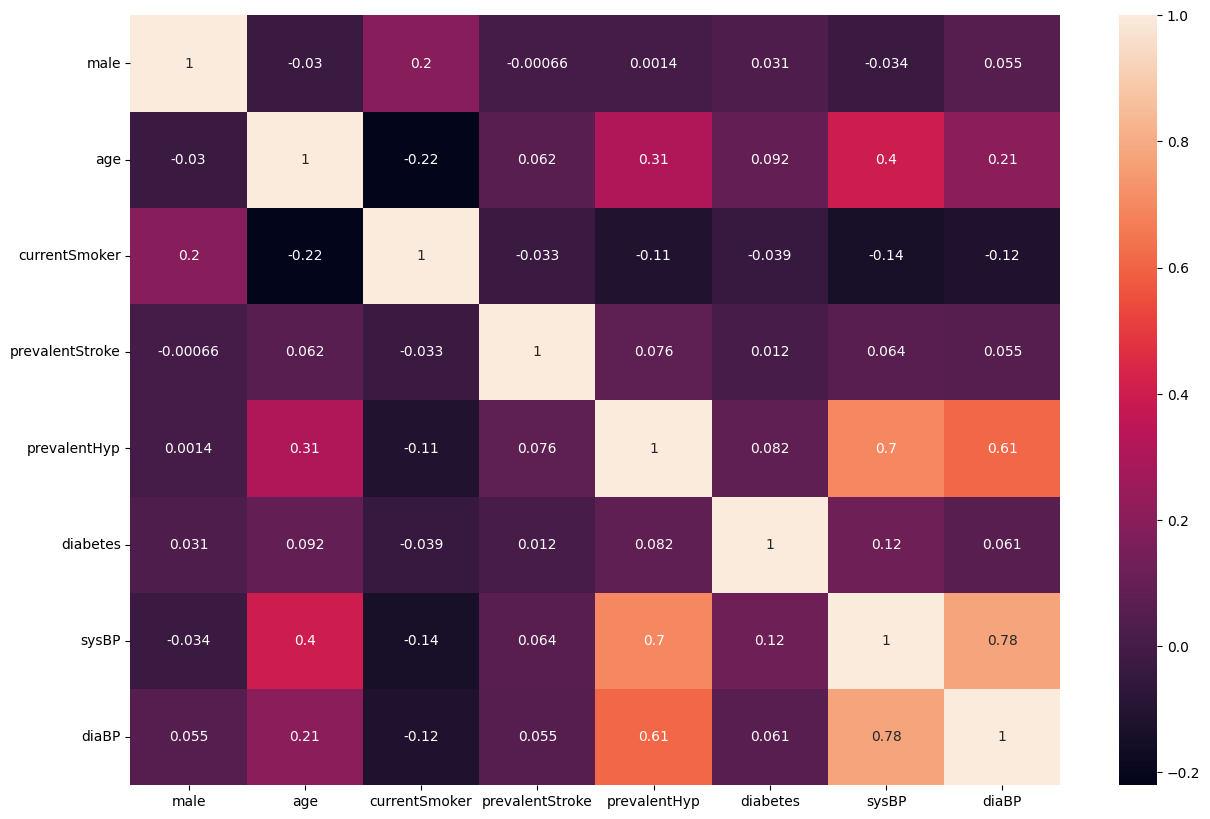

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [17]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [18]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
regressor=DecisionTreeRegressor()

In [21]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [22]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [23]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [24]:
## predictions
y_pred=grid.predict(X_test)

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [26]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-0.0379294818178586
0.23483434442483817
0.11444007379307101


In [27]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [28]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5, 0.9, 'x[4] <= 0.1\nfriedman_mse = 0.133\nsamples = 3390\nvalue = 0.158'),
 Text(0.25, 0.7, 'x[2] <= 0.721\nfriedman_mse = 0.099\nsamples = 2325\nvalue = 0.111'),
 Text(0.125, 0.5, 'x[6] <= 131.556\nfriedman_mse = 0.084\nsamples = 1079\nvalue = 0.093'),
 Text(0.0625, 0.3, 'x[1] <= 50.719\nfriedman_mse = 0.076\nsamples = 808\nvalue = 0.083'),
 Text(0.03125, 0.1, 'friedman_mse = 0.04\nsamples = 484\nvalue = 0.041'),
 Text(0.09375, 0.1, 'friedman_mse = 0.124\nsamples = 324\nvalue = 0.145'),
 Text(0.1875, 0.3, 'x[3] <= 0.231\nfriedman_mse = 0.107\nsamples = 271\nvalue = 0.122'),
 Text(0.15625, 0.1, 'friedman_mse = 0.104\nsamples = 270\nvalue = 0.119'),
 Text(0.21875, 0.1, 'friedman_mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.375, 0.5, 'x[1] <= 52.61\nfriedman_mse = 0.111\nsamples = 1246\nvalue = 0.128'),
 Text(0.3125, 0.3, 'x[1] <= 48.663\nfriedman_mse = 0.092\nsamples = 981\nvalue = 0.102'),
 Text(0.28125, 0.1, 'friedman_mse = 0.074\nsamples = 819\nvalue = 0.081'),
 Text(0.34

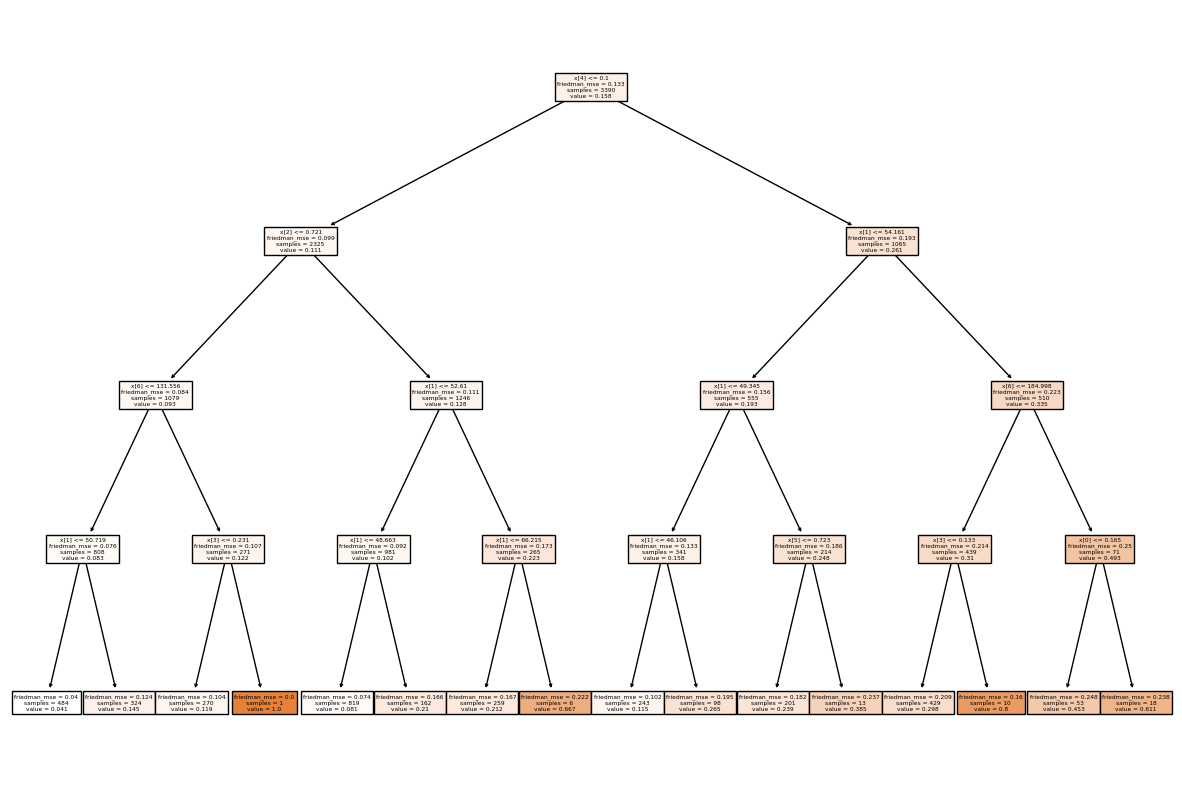

In [29]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)